In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

In [10]:
import sqlite3

#Connecting to the SQLite Database
connection = sqlite3.connect('amazon_data.db')
cursor = connection.cursor()

#Printing the available tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

cursor.execute("SELECT * FROM purchases_and_survey;") 
rows = cursor.fetchall()
df = pd.DataFrame(rows)

connection.close()


[('amazon_purchases',), ('amazon_survey',), ('purchases_and_survey',)]


In [14]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

In [74]:
df[['Order Date', 'Purchase Price Per Unit', 'Quantity', 'Survey ResponseID', 'Q-substance-use-alcohol']].isnull().sum()

0
Order Date                 0
Purchase Price Per Unit    0
Quantity                   0
Survey ResponseID          0
Survey ResponseID          0
Q-substance-use-alcohol    0
dtype: int64

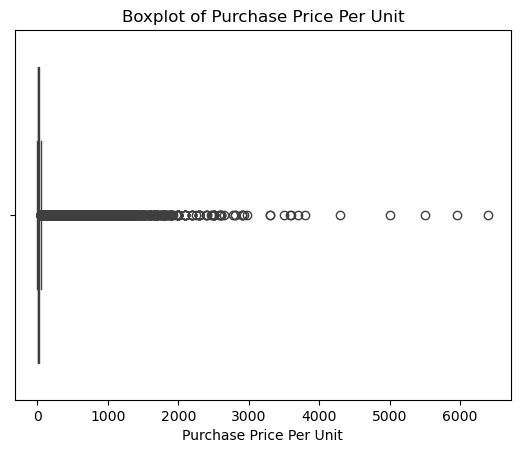

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Purchase Price Per Unit
sns.boxplot(x=df['Purchase Price Per Unit'])
plt.title('Boxplot of Purchase Price Per Unit')
plt.show()

In [46]:
#Analyzing Trends of Income
income_trends = df.groupby('Q-demos-income').agg({
    'Purchase Price Per Unit': 'mean',
    'Quantity': 'sum'
}).reset_index()
income_trends = income_trends.sort_values(by='Purchase Price Per Unit', ascending=False)
print(income_trends)

0       Q-demos-income Purchase Price Per Unit Quantity
1     $150,000 or more               24.556587   275390
0  $100,000 - $149,999               23.402198   426644
4    $75,000 - $99,999               23.110302   322306
3    $50,000 - $74,999               22.667194   401053
2    $25,000 - $49,999               21.409348   377228
5    Less than $25,000               20.361164   191051
6    Prefer not to say               19.418221    21086


In [60]:
income_trends

,Q-demos-income,Purchase Price Per Unit,Quantity
1,"$150,000 or more",24.556587,275390
0,"$100,000 - $149,999",23.402198,426644
4,"$75,000 - $99,999",23.110302,322306
3,"$50,000 - $74,999",22.667194,401053
2,"$25,000 - $49,999",21.409348,377228
5,"Less than $25,000",20.361164,191051
6,Prefer not to say,19.418221,21086


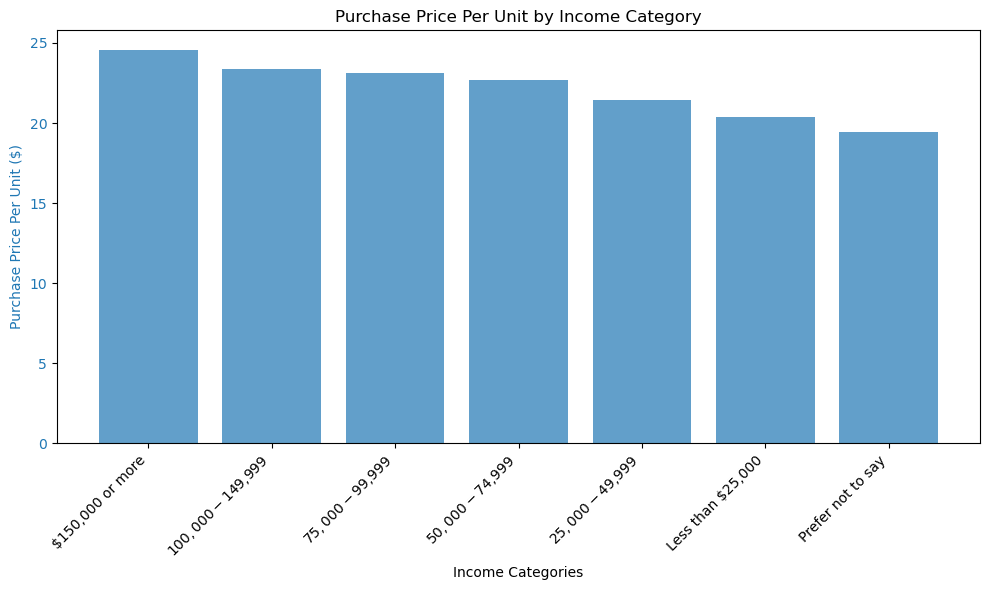

In [64]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(income_trends['Q-demos-income'], income_trends['Purchase Price Per Unit'], color='tab:blue', alpha=0.7, label='Purchase Price Per Unit')
ax1.set_xlabel('Income Categories')
ax1.set_ylabel('Purchase Price Per Unit ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Purchase Price Per Unit by Income Category')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

# Show the plot
plt.show()

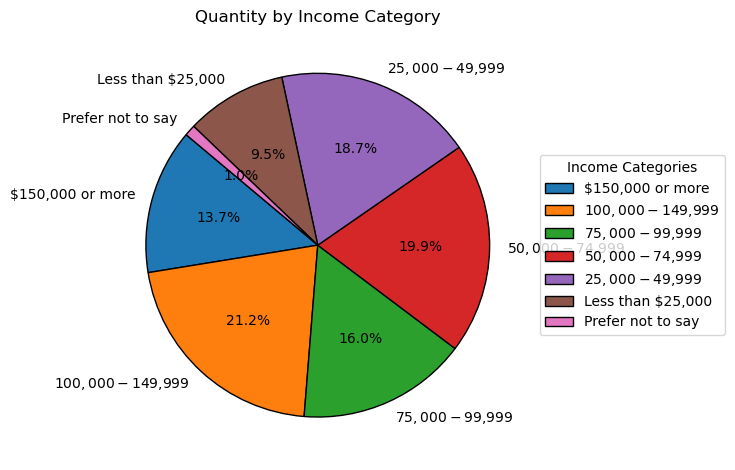

In [112]:
#Pie Chart, showing Quantity by Income Categories
fig, ax = plt.subplots()
plt.title('Quantity by Income Category')
wedges, texts, autotexts = ax.pie(
    income_trends['Quantity'], 
    labels=income_trends['Q-demos-income'], 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

for text in texts + autotexts:
    text.set_fontsize(10)

ax.legend(wedges, income_trends['Q-demos-income'], 
          title="Income Categories", 
          loc="center left", 
          bbox_to_anchor=(1, 0.5))  

plt.tight_layout()  
plt.show()

In [26]:
#Analyzing Trends by State
state_trends = df.groupby('Shipping Address State').agg({
    'Purchase Price Per Unit': 'mean'
}).reset_index()
state_trends = state_trends.sort_values(by='Purchase Price Per Unit', ascending=False)
print(state_trends)

0  Shipping Address State Purchase Price Per Unit
52                     WY                30.87987
22                     ME               28.850299
40                     PR               28.845278
27                     MT               27.922453
12                     HI               27.751902
43                     SD               26.276432
30                     NE                25.17619
1                      AK               25.116085
0                                       25.065008
14                     ID               24.712815
9                      DE               24.049811
26                     MS               24.018873
18                     KY               23.852749
46                     UT               23.837044
6                      CO               23.825947
2                      AL               23.508135
31                     NH               23.362516
33                     NM                 23.2056
50                     WI               23.196782


In [52]:
#Analyzing by State and Income
state_income_trends = df.groupby(['Shipping Address State', 'Q-demos-income']).agg({
    'Purchase Price Per Unit': 'mean',
    'Quantity': 'mean'
}).reset_index()

row_counts = df.groupby(['Shipping Address State', 'Q-demos-income']).size().reset_index(name='Row Count')
state_income_trends = pd.merge(state_income_trends, row_counts, on=['Shipping Address State', 'Q-demos-income'])
state_income_trends = state_income_trends.sort_values(by='Purchase Price Per Unit', ascending=False)


print(state_income_trends)

    Shipping Address State       Q-demos-income Purchase Price Per Unit  \
63                      DE  $100,000 - $149,999              114.518412   
154                     ME     $150,000 or more               63.600328   
213                     NH  $100,000 - $149,999               44.342221   
296                     SD    $50,000 - $74,999               43.639451   
327                     VT     $150,000 or more               41.038182   
..                     ...                  ...                     ...   
97                      IA    Prefer not to say               12.024839   
27                      AR    Prefer not to say                   10.99   
104                     ID    Prefer not to say                8.826667   
205                     ND    Less than $25,000                    7.24   
292                     SC    Prefer not to say                6.921864   

     Quantity  Row Count  
63       1.85        340  
154  1.032787        122  
213  1.213687     

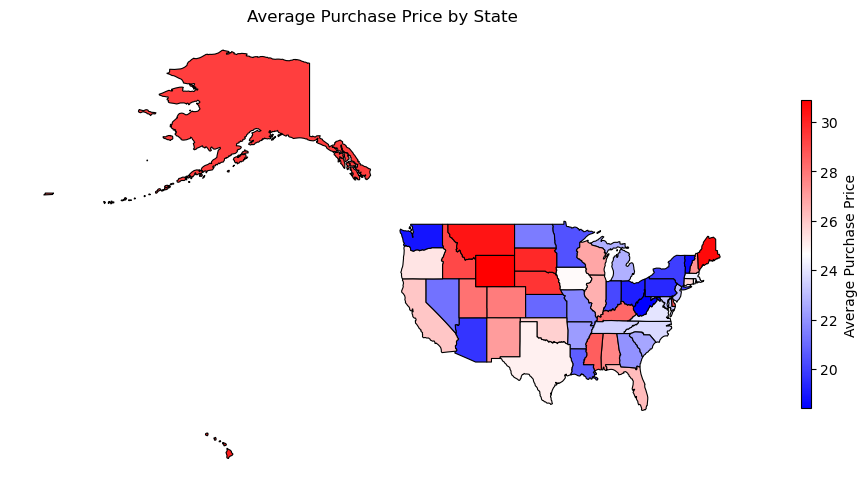

In [116]:
#Map Visualization for States vs Average Purchase Price
state_name_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Convert state abbreviations to full names
state_trends['State Name'] = state_trends['Shipping Address State'].map(state_name_map)

usa = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# Merge state purchase price data with the map
usa = usa.merge(state_trends, left_on='name', right_on='State Name', how='left')

cmap = plt.cm.bwr  
norm = mcolors.Normalize(vmin=state_trends['Purchase Price Per Unit'].min(), 
                         vmax=state_trends['Purchase Price Per Unit'].max())

fig, ax = plt.subplots(figsize=(12, 8))
usa.plot(column='Purchase Price Per Unit', cmap=cmap, linewidth=0.8, edgecolor='black', legend=False, ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=30)  # Adjust colorbar size
cbar.set_label("Average Purchase Price")

plt.title('Average Purchase Price by State')
plt.axis('off')
plt.show()

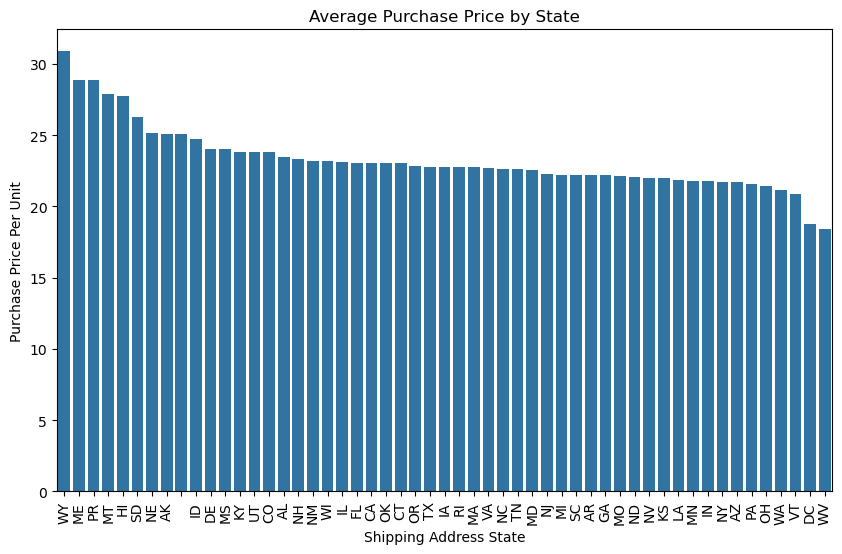

In [118]:
#Graph Purchase Price by State
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Address State', y='Purchase Price Per Unit', data=state_trends)
plt.title('Average Purchase Price by State')
plt.xticks(rotation=90)
plt.show()